<a href="https://colab.research.google.com/github/Paospina0718/Metodos-multivariados-2024-1/blob/main/Taller_Hotelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller T$^2$ Hotelling
**Integrantes:**

Paola Andrea Ospina Sánchez. CC. 1007355141

Laura Alejandra Valbuena Gaona. CC. 1000061520

# Librerias

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Punto 0.1

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Maestria/Semestre 1/Métodos multivariados/Talleres métodos/Punto1.xlsx')
data = data.drop('muestra',axis=1)

Text(0.5, 1.0, 'Correlación procedencia 1')

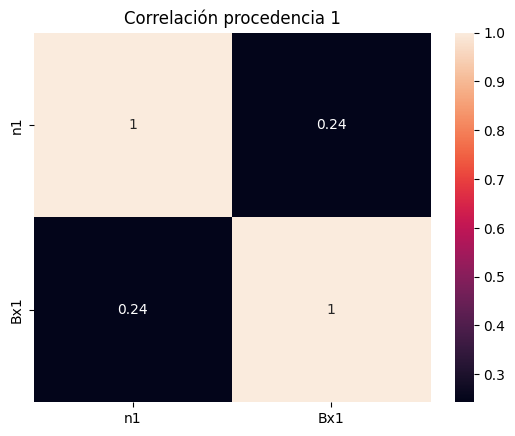

In [ ]:
cor = data[['n1','Bx1']].corr(method='spearman')
sns.heatmap(cor,annot=True)
plt.title('Correlación procedencia 1')

Text(0.5, 1.0, 'Correlación procedencia 2')

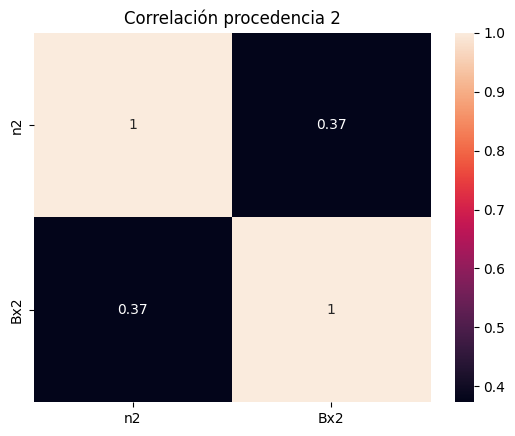

In [ ]:
cor = data[['n2','Bx2']].corr(method='spearman')
sns.heatmap(cor,annot=True)
plt.title('Correlación procedencia 2')

In [ ]:
des = data.describe()
median = pd.DataFrame({'median':data.median()}).T
cv = pd.DataFrame({'cv':(data.std()/data.mean())*100}).T
variance = pd.DataFrame({'variance':data.var()}).T
range = pd.DataFrame({'range':data.max()-data.min()}).T
int_range = pd.DataFrame({'int_range':data.quantile(0.75)-data.quantile(0.25)}).T
trunc_mean = pd.DataFrame({'trunc_mean':data.apply(lambda x: np.mean(x[(x >= np.percentile(x, 10)) & (x <= np.percentile(x, 90))]))}).T
winso_mean = pd.DataFrame({'winso_mean':data.apply(lambda x: np.mean(np.clip(x, np.percentile(x, 10), np.percentile(x, 90))))}).T
c_20 = pd.DataFrame({'20%':data.quantile(0.20)}).T
c_80 = pd.DataFrame({'80%':data.quantile(0.80)}).T
e_des = pd.concat([des,median,cv,variance,range,int_range,trunc_mean,
                   winso_mean,c_20,c_80],axis=0)
e_des

,n1,Bx1,n2,Bx2
count,22.000000,22.000000,22.000000,22.000000
mean,544.045455,80.154545,468.909091,81.413636
std,25.969721,0.722909,35.779629,0.522171
min,480.000000,78.000000,400.000000,80.400000
25%,525.000000,79.950000,450.000000,81.025000
50%,550.500000,80.300000,482.500000,81.450000
75%,559.000000,80.475000,497.750000,81.800000
max,600.000000,81.200000,512.000000,82.200000
median,550.500000,80.300000,482.500000,81.450000
cv,4.773447,0.901894,7.630398,0.641380


In [ ]:
p1 = data[['n1','Bx1']].values
p2 = data[['n2','Bx2']].values

media_p1 = np.mean(p1, axis=0)
media_p2 = np.mean(p2, axis=0)

cov_p1 = np.cov(p1, rowvar=False)
cov_p2 = np.cov(p2, rowvar=False)

In [ ]:
n_p1 = p1.shape[0]
n_p2 = p2.shape[0]
cov_pond = ((n_p1 - 1) * cov_p1 + (n_p2 - 1) * cov_p2) / (n_p1 + n_p2 - 2)
cov_pond

array([[9.77304113e+02, 4.77316017e+00],
       [4.77316017e+00, 3.97629870e-01]])

In [ ]:
dif = media_p1 - media_p2
t2 = np.dot(np.dot(dif.T, np.linalg.inv(cov_pond)), dif)
t2 #Estadistico de hotelling

12.840263536786658

In [ ]:
p = p1.shape[1]
df1 = p
df2 = n - p - 1
print(df1)
print(df2) #grados de libertad

2
41


In [ ]:
val_crit = f.ppf(0.95, df1, df2)
val_crit #Valor Critico

3.225683842295448

In [ ]:
p_valor = 1 - f.cdf(t2, df1, df2)
p_valor

4.6783107959580406e-05

Para este caso el estadistico de Hotelling es de 12.84, el p_valor de 4,67 x10$^{-5}$ y el valor crítico de 3.22, por lo que se puede decir que las dos mieles tienen características diferentes y sus medias de viscosidad y brix no son las mismas

In [ ]:
t2_n = (media_p1[0] - media_p2[0])**2 / cov_pond[0, 0]
t2_Bx = (media_p1[1] - media_p2[1])**2 / cov_pond[1, 1]
print(t2_n)
print(t2_Bx)

5.776577697746332
3.986898461218654


Al comparar los resultados individuales por variable con el valor crítico, nos podemos dar cuenta que ambas variables contribuyen a las diferencias observadas, pero la viscosidad en mayor medida.

#Punto 2

In [ ]:
data1 = pd.read_excel('/content/drive/MyDrive/Maestria/Semestre 1/Métodos multivariados/Talleres métodos/Punto2.xlsx')
data1 = data1.drop('muestra',axis=1)

Text(0.5, 1.0, 'Correlación fecha 1')

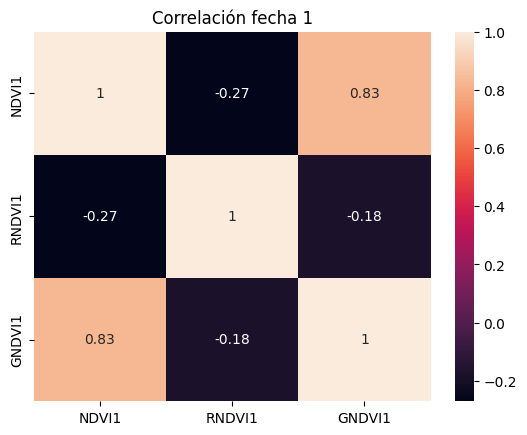

In [ ]:
cor = data1[['NDVI1', 'RNDVI1', 'GNDVI1']].corr(method='spearman')
sns.heatmap(cor,annot=True)
plt.title('Correlación fecha 1')

Text(0.5, 1.0, 'Correlación fecha 2')

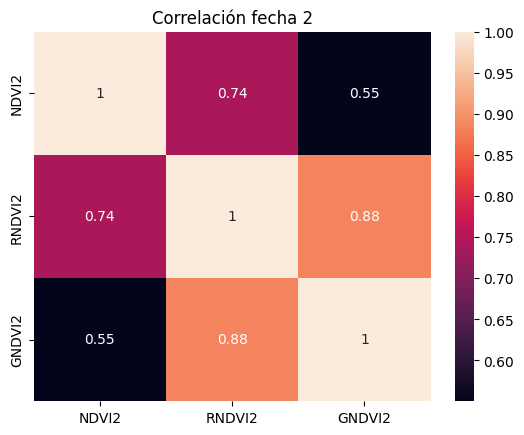

In [ ]:
cor = data1[['NDVI2', 'RNDVI2', 'GNDVI2']].corr(method='spearman')
sns.heatmap(cor,annot=True)
plt.title('Correlación fecha 2')

In [ ]:
des = data1.describe()
median = pd.DataFrame({'median':data1.median()}).T
cv = pd.DataFrame({'cv':(data1.std()/data1.mean())*100}).T
variance = pd.DataFrame({'variance':data1.var()}).T
range = pd.DataFrame({'range':data1.max()-data1.min()}).T
int_range = pd.DataFrame({'int_range':data1.quantile(0.75)-data1.quantile(0.25)}).T
trunc_mean = pd.DataFrame({'trunc_mean':data1.apply(lambda x: np.mean(x[(x >= np.percentile(x, 10)) & (x <= np.percentile(x, 90))]))}).T
winso_mean = pd.DataFrame({'winso_mean':data1.apply(lambda x: np.mean(np.clip(x, np.percentile(x, 10), np.percentile(x, 90))))}).T
c_20 = pd.DataFrame({'20%':data1.quantile(0.20)}).T
c_80 = pd.DataFrame({'80%':data1.quantile(0.80)}).T
e_des = pd.concat([des,median,cv,variance,range,int_range,trunc_mean,
                   winso_mean,c_20,c_80],axis=0)
e_des

,NDVI1,RNDVI1,GNDVI1,NDVI2,RNDVI2,GNDVI2
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.609133,0.873563,0.683613,0.687763,0.870512,0.724146
std,0.042381,0.010024,0.012584,0.146597,0.016804,0.018101
min,0.490942,0.849259,0.654971,0.073813,0.822981,0.686398
25%,0.604812,0.872808,0.679377,0.709647,0.866457,0.711616
50%,0.615987,0.876460,0.685224,0.725689,0.874858,0.723169
75%,0.631306,0.880144,0.691898,0.734768,0.880546,0.738981
max,0.660564,0.883310,0.699582,0.744853,0.892264,0.754312
median,0.615987,0.876460,0.685224,0.725689,0.874858,0.723169
cv,6.957532,1.147485,1.840878,21.315076,1.930315,2.499623


In [ ]:
fecha1 = data1[['NDVI1', 'RNDVI1', 'GNDVI1']].values
fecha2 = data1[['NDVI2', 'RNDVI2', 'GNDVI2']].values

diferencias = fecha2 - fecha1
media_dif = np.mean(diferencias, axis=0)
cov_dif = np.cov(diferencias, rowvar=False)
cov_dif

array([[ 2.43363031e-02, -5.08538731e-04,  5.04600704e-06],
       [-5.08538731e-04,  4.33411544e-04,  1.19379205e-04],
       [ 5.04600704e-06,  1.19379205e-04,  1.49113810e-04]])

In [ ]:
n = len(fecha1)
mat_cov = cov_dif / n

t2 = n * np.dot(media_dif.T, np.dot(np.linalg.inv(mat_cov), media_dif))
t2 #Estadístico de Hotelling

5908.641920720405

In [ ]:
df1 = 3
df2 = n - 1
print(df1)
print(df2) #Grados de libertad

3
19


In [ ]:
val_crit = f.ppf(1 - 0.05, df1, df2)
val_crit

3.127350005113399

In [ ]:
p_valor = 1 - f.cdf(t2, df1, df2)
p_valor

1.1102230246251565e-16

Para este caso el estadistico de Hotelling es de 5908.64, el p_valor de 1,11 x10$^{−16}$  y el valor crítico de 3.12, por lo que se puede decir que las dos fechas presentan cambios

In [ ]:
np.dot(media_dif, np.linalg.inv(mat_cov))

array([   19.86131264, -2071.54538091,  7094.26593119])

En este caso, la única variable que no contribuyó a los cambios observados fue el RNDVI. Por otro lado, la variable que más contribuyo a las diferencias observadas fue el GNDVI